## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


df = pd.read_csv('Position_Salaries.csv')
print("data=\n",df)

df = shuffle(df).reset_index(drop=True)
print("Shuffled data =\n",df)


X = df.iloc[:,1:2].values # make X data into matrix/array
print("X=\n",X)

y = df.iloc[:,2].values # make y data into matrix/array
print("y=\n",y)

#Categorical

# #changing categories(text) into numbers for computation
# from sklearn.preprocessing import LabelEncoder
# le_X = LabelEncoder()
# #change countries names to numbers
# X[:,3] = le_X.fit_transform(X[:,3])
# print("Categorized X = \n", X)


# #to avoid the model to assume ranking countries as they aare categorized with numbers
# from sklearn.preprocessing import OneHotEncoder  
# encoder = OneHotEncoder(categorical_features=[3])
# X = encoder.fit_transform(X).toarray()
# print("Encoded X = \n", X)


# from sklearn.cross_validation import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# print("X Training = \n",X_train)
# print("X Test = \n",X_test)
# print("y Training = \n",y_train)
# print("y Test = \n",y_test)




/home/shangeth/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shangeth/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


data=
             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
Shuffled data =
             Position  Level   Salary
0     Senior Partner      8   300000
1    Country Manager      5   110000
2   Business Analyst      1    45000
3     Region Manager      6   150000
4  Senior Consultant      3    60000
5            Partner      7   200000
6  Junior Consultant      2    50000
7            Manager      4    80000
8                CEO     10  1000000
9            C-level      9   500000
X=
 [[ 8]
 [ 5]
 [ 1]
 [ 6]
 [ 3]
 [ 7]
 [ 2]
 [ 4]
 [10]
 [ 9]]
y=
 [ 300000  110000   45000  150000   60000  200000   50000   80000 1000000
  500000]


 ## Sklearn Models

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.predict(6.5)

array([330378.78787879])

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

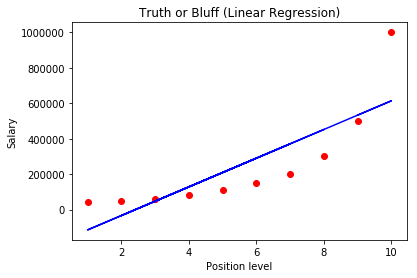

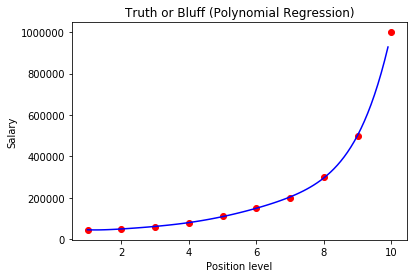

In [44]:

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [45]:


# Predicting a new result with Linear Regression
lin_reg.predict(6.5)

# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([174192.8193054])